<a href="https://colab.research.google.com/github/Abhay069/Gold-Price-Prediction-/blob/main/Gold_Price_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

kaggle dataset

[ these 2 methods will only download zip file. ]

this just try

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("altruistdelhite04/gold-price-data")

print("Path to dataset files:", path)

100%|██████████| 41.9k/41.9k [00:00<00:00, 27.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/altruistdelhite04/gold-price-data/versions/1


other way

In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d altruistdelhite04/gold-price-data

Dataset URL: https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data
License(s): unknown
  0% 0.00/41.9k [00:00<?, ?B/s]
100% 41.9k/41.9k [00:00<00:00, 47.3MB/s]


Data Collection and Processing

In [ ]:
# loading the csv data to Pandas DataFrame
gold_data = pd.read_csv('/content/gld_price_data (1).csv')
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
# print last 5 rows of the dataset
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
# numbers of rows and column
gold_data.shape

(2290, 6)

In [ ]:
# getting some basic information for data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
# checking the no of missing value
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [ ]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation :
1. Positive Correlation
2. Negative Correlation

In [ ]:
# Convert 'Date' column to datetime objects
gold_data['Date'] = pd.to_datetime(gold_data['Date'])                            #pd.to_datetime():This function in pandas takes a column (or Series) of data and tries to convert its elements into datetime objects.
#now correlation
correlation = gold_data.corr()

<Axes: >

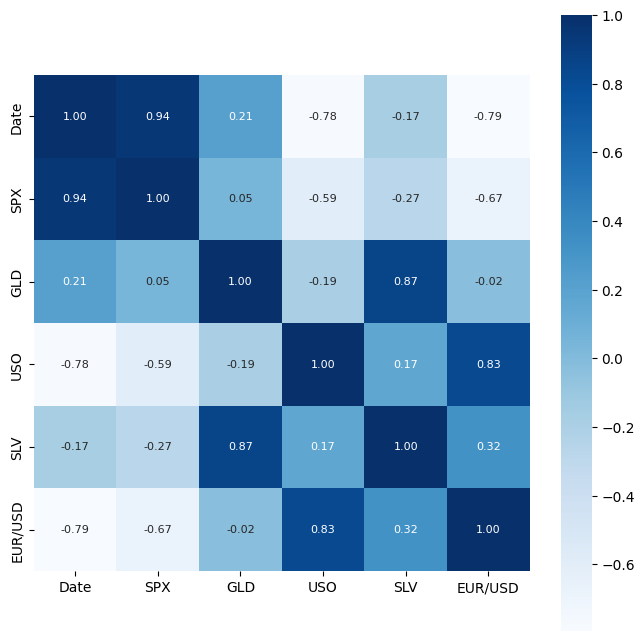

In [ ]:
# constructing a heatmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True , square=True , fmt=".2f" , annot=True , annot_kws={'size':8} , cmap="Blues")

In [ ]:
# correlation value of GOLD
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-70-ed5d08404b0b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='red')


<Axes: xlabel='GLD', ylabel='Density'>

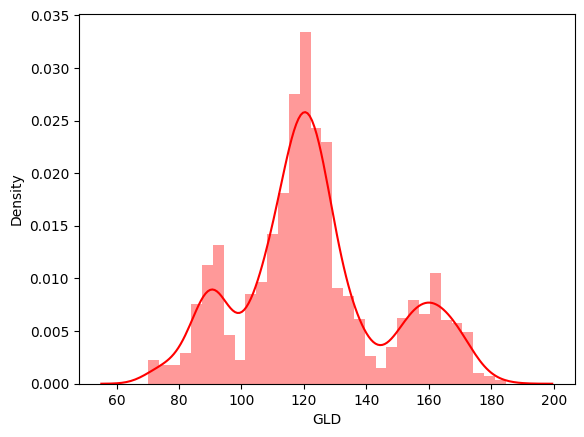

In [ ]:
# checking the distribution of the GLD
sns.distplot(gold_data['GLD'],color='red')

Spliting the Features and Target

In [ ]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training Data and Test Data

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y, test_size=0.2 , random_state=2) #X and Y: Input features (X) and target labels (Y) for your dataset.

# test_size=0.2: 20% of your data will be allocated to the testing set, while 80% will go to the training set.

# random_state=2: Sets a seed for random number generation to ensure reproducibility. Using the same seed guarantees the same split each time you run the code.

# X_train and Y_train: Contain the training data and corresponding labels.

# X_test and Y_test: Contain the testing data and corresponding labels.

Model Training : Random Forest Regressor

 Sure! Imagine a random forest as a group of decision trees working together as a team. Each decision tree in the forest is like a person making a prediction or decision based on the data it sees. However, no single tree is perfect—it might make mistakes. By combining the opinions (or decisions) of many trees, the random forest can give a more accurate and reliable prediction.

Here's how it works in simple terms:

 The Forest: A "forest" is made up of many "trees," which are individual decision trees.

 Randomness: To make the forest diverse, each tree is built using a random sample of data from the whole dataset. Additionally, when splitting the data into branches, each tree considers only a random selection of features (or columns).

 Voting: For classification problems (e.g., categorizing emails as spam or not), each tree "votes" on the final category, and the majority vote becomes the final decision. For regression problems (e.g., predicting house prices), the average of all the tree predictions is taken.

Why is it great? Random forests are less likely to overfit (memorize the data instead of learning patterns) and are robust because they combine multiple trees to improve accuracy.

In [ ]:
regressor = RandomForestRegressor(n_estimators=100) # RandomForestRegressor: 1. This is a machine learning algorithm used for regression tasks, meaning it's designed to predict continuous values (e.g., house prices, temperatures).
                                                                             # 2. It works by building a "forest" of decision trees and averaging their predictions to produce the final result.
                                                                             # n_estimators=100:This parameter specifies the number of decision trees in the random forest.

                                                                             # In this example, 100 trees will be created, and their predictions will be combined (averaged) to give the final output.

                                                                             # The more trees you use, the more stable and accurate the model tends to be (up to a certain point).

In [ ]:
# training the model
regressor.fit(X_train , Y_train)

RandomForestRegressor()

Model Evaluation

In [ ]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)

[168.69899963  81.94939992 115.85530032 127.47310105 120.74020126
 154.67029797 150.40579828 126.32859994 117.51819871 125.94450053
 116.77210096 170.80990036 141.62719858 167.84909835 115.11390013
 118.06790051 139.06110321 170.36690099 159.6459043  159.40239938
 155.13890036 125.23989997 175.95999868 157.28230364 125.22500037
  94.06549962  77.26910016 120.34209995 119.14049922 167.44469898
  88.13119973 125.37760013  91.25570106 117.52160024 121.18659934
 136.38780079 115.51690121 114.95880068 146.86920091 106.96680074
 104.5722025   87.28209773 126.57920067 117.93610009 152.37739888
 119.56790022 108.2963999  107.85569819  93.21020056 127.09149775
  74.97850029 113.55129955 121.26399985 111.3606996  118.84089881
 120.89999934 159.29920065 166.3385011  147.01879695  85.62989835
  94.30510059  86.73609882  90.56660037 119.03290051 126.35940065
 127.60450003 170.02039942 122.3938999  117.31049905  98.56660051
 168.21310109 143.16119864 131.74490311 121.20650166 121.46659947
 119.90330

In [ ]:
# R squared error
error_score = metrics.r2_score(Y_test , test_data_prediction)
print("R squared error : " , error_score )

 # metrics.r2_score: This function calculates the R-squared score (also called the coefficient of determination). It is a metric used to evaluate how well your regression model’s predictions fit the actual data.

# The R-squared value ranges between 0 and 1:

# 1 means perfect prediction—your model’s predictions match the actual values exactly.

# 0 means the model does no better than simply predicting the average of the target values.

# Y_test: This is the actual, observed data (the true values) from your test dataset.

# test_data_prediction: These are the predicted values generated by your trained regression model based on the test data.

# error_score: This variable stores the calculated R-squared value, showing how well your model’s predictions fit the true values.

# print statement: This simply displays the R-squared error score on the screen with the message "R squared error : " followed by the actual value.

R squared error :  0.9896952491785125


Compare the Actual Value and Predicted Value in a Plot

In [ ]:
# converting the Y_test into list
Y_test = list(Y_test)

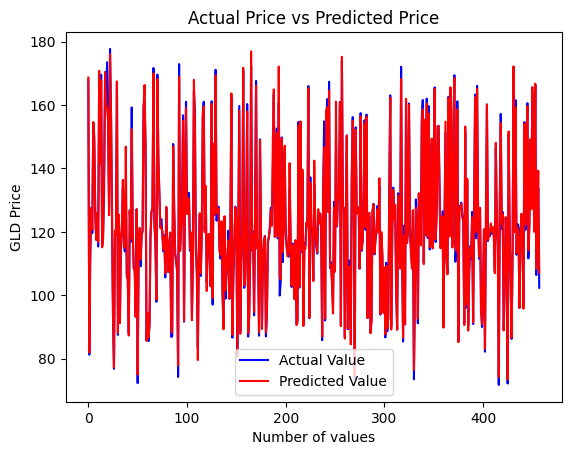

In [ ]:
# for actual value
plt.plot(Y_test , color='blue' , label= 'Actual Value' )
# for pridicted value
plt.plot(test_data_prediction , color='red' , label='Predicted Value' )
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()                                                                     #plt.legend():This adds a legend to the plot so you can distinguish between the blue line (Actual Value) and the red line (Predicted Value).
plt.show()